<a href="https://colab.research.google.com/github/Alejandro-Casanova/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Tue Jun 20 08:39:25 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

2.0.1+cu118


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

Autonomous Vehicles, Manufacturing and Quality Control, Healthcare, Robotics...

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

Overfitting in machine learning refers to a situation when a model performs well on the training data but fails to generalize to new, unseen data due to its over-reliance on the training examples.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

1.   Using more training data to increase the diversity and generalize better.
2.   Applying regularization techniques like L1 or L2 regularization to add a penalty for complex model parameters.
3.   Employing early stopping by monitoring performance on a validation set and stopping training when the performance starts to deteriorate.


## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [3]:
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

print(f"Torchvision version: {torchvision.__version__}")

train_data = datasets.MNIST(root="data", train=True, download=True, transform=ToTensor())
test_data = datasets.MNIST(root="data", train=False, download=True, transform=ToTensor())

print(f"Train Data Length: {len(train_data.data)}")
print(f"Test Data Length: {len(test_data.data)}")

Torchvision version: 0.15.2+cu118


100%|██████████| 9912422/9912422 [00:00<00:00, 323209347.80it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 115147997.93it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 149432626.71it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 21309316.30it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Train Data Length: 60000
Test Data Length: 10000


In [4]:
train_data, train_data.classes

(Dataset MNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 ['0 - zero',
  '1 - one',
  '2 - two',
  '3 - three',
  '4 - four',
  '5 - five',
  '6 - six',
  '7 - seven',
  '8 - eight',
  '9 - nine'])

## 6. Visualize at least 5 different samples of the MNIST training dataset.

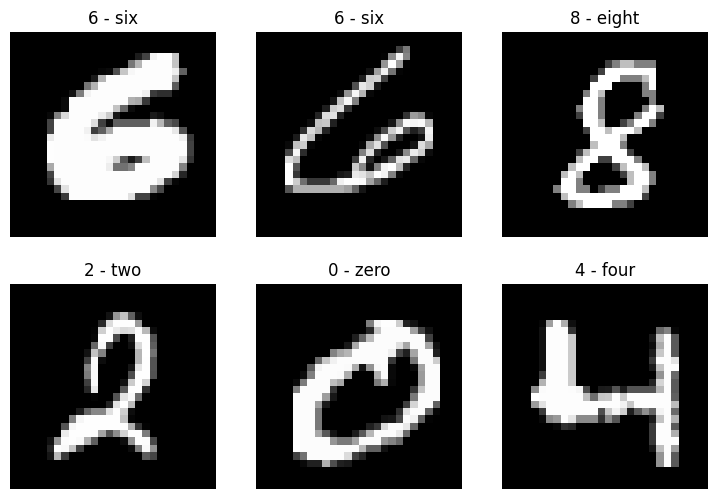

In [5]:
import matplotlib.pyplot as plt

class_names = train_data.classes

# Plot images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 6))
rows, cols = 2, 3
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [6]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [7]:
import torch.nn as nn
from copy import deepcopy

# Create a convolutional neural network
class MNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

torch.manual_seed(42)
model_2 = MNISTModelV2( input_shape=1,
                        hidden_units=10,
                        output_shape=len(class_names)).to(device)

model_2_initial_state_dict = deepcopy(model_2.state_dict())
model_2

MNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [8]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(target=y,
                                 preds=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    train_acc *= 100 # Percentage
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(target=y,
                preds=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        test_acc *= 100 # Percentage
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [9]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [10]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 80.2 MB/s eta 0:00:00
mlxtend version: 0.22.0


In [11]:
torch.manual_seed(42)

# Import tqdm for progress bar
from tqdm.auto import tqdm

# Measure time
from timeit import default_timer as timer

# Accuracy Function
import torchmetrics
accuracy_fn= torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

# Train and test model
epochs = 5
train_time_start_model_2 = timer()
for device in ['cuda', 'cpu']:
  model_2.load_state_dict(model_2_initial_state_dict)
  optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)
  for epoch in tqdm(range(epochs)):
      print(f"Epoch: {epoch}\n---------")
      train_step(data_loader=train_dataloader,
          model=model_2,
          loss_fn=loss_fn,
          optimizer=optimizer,
          accuracy_fn=accuracy_fn,
          device=device
      )
      test_step(data_loader=test_dataloader,
          model=model_2,
          loss_fn=loss_fn,
          accuracy_fn=accuracy_fn,
          device=device
      )

  train_time_end_model_2 = timer()
  total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)
  if device == 'cuda':
    total_train_time_model_2_cuda = total_train_time_model_2
  else:
    total_train_time_model_2_cpu = total_train_time_model_2

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.33395 | Train accuracy: 88.75%
Test loss: 0.07322 | Test accuracy: 97.69%

Epoch: 1
---------
Train loss: 0.08098 | Train accuracy: 97.44%
Test loss: 0.06982 | Test accuracy: 97.80%

Epoch: 2
---------
Train loss: 0.06318 | Train accuracy: 98.02%
Test loss: 0.05687 | Test accuracy: 98.17%

Epoch: 3
---------
Train loss: 0.05503 | Train accuracy: 98.28%
Test loss: 0.05908 | Test accuracy: 97.99%

Epoch: 4
---------
Train loss: 0.04931 | Train accuracy: 98.45%
Test loss: 0.04345 | Test accuracy: 98.42%

Train time on cuda: 97.634 seconds


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.25828 | Train accuracy: 91.51%
Test loss: 0.05903 | Test accuracy: 98.18%

Epoch: 1
---------
Train loss: 0.06719 | Train accuracy: 97.92%
Test loss: 0.04756 | Test accuracy: 98.35%

Epoch: 2
---------
Train loss: 0.05219 | Train accuracy: 98.40%
Test loss: 0.03899 | Test accuracy: 98.69%

Epoch: 3
---------
Train loss: 0.04389 | Train accuracy: 98.65%
Test loss: 0.03918 | Test accuracy: 98.63%

Epoch: 4
---------
Train loss: 0.03872 | Train accuracy: 98.75%
Test loss: 0.03497 | Test accuracy: 98.74%

Train time on cpu: 337.292 seconds


In [12]:
import pandas as pd
compare_results = pd.DataFrame([{'cpu': total_train_time_model_2_cpu,
                                'cuda': total_train_time_model_2_cuda}],
                               ['runtime'])
compare_results

,cpu,cuda
runtime,337.292005,97.633664


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

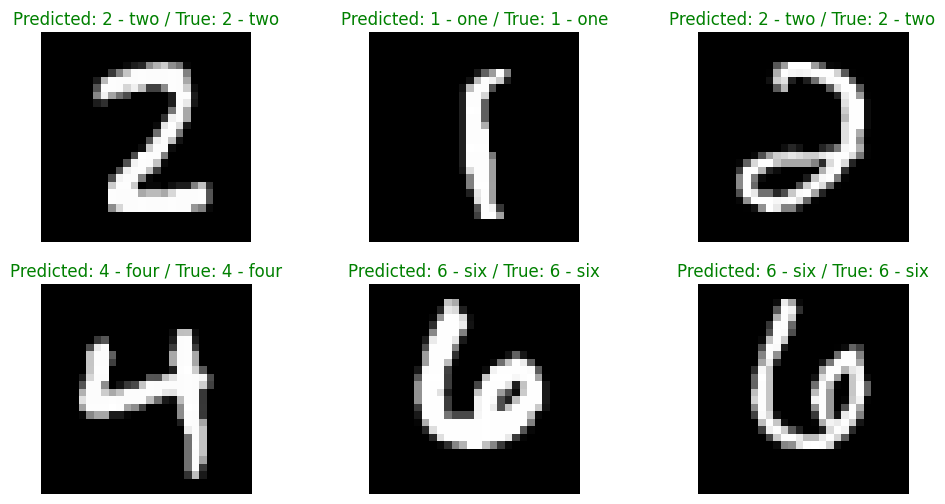

In [13]:
import random
random.seed(42)

test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=6):
    test_samples.append(sample)
    test_labels.append(label)

# test_samples = torch.tensor(test_samples)
test_samples = torch.stack(test_samples, dim=0).to(device)
# print(test_samples.shape)

model_2.eval()
with torch.inference_mode():
  pred_logits = model_2(test_samples)
  pred_probs = pred_logits.softmax(dim=1)
  pred_labels = pred_probs.argmax(dim=1)
  # print(pred_labels.shape)
  # print(test_labels)

# Plot images
fig = plt.figure(figsize=(12, 6))
rows, cols = 2, 3
for i in range(1, rows * cols + 1):
    pred_label = pred_labels[i-1]
    truth_label = test_labels[i-1]
    fig.add_subplot(rows, cols, i)
    plt.imshow(test_samples[i-1].squeeze(), cmap="gray")
    title_text = f"Predicted: {class_names[pred_label]} / True: {class_names[truth_label]}"

    # Check for equality and change title colour accordingly
    if pred_label == truth_label:
        plt.title(title_text, fontsize=12, c="g") # green text if correct
    else:
        plt.title(title_text, fontsize=12, c="r") # red text if wrong
    plt.axis(False);

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [14]:
# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

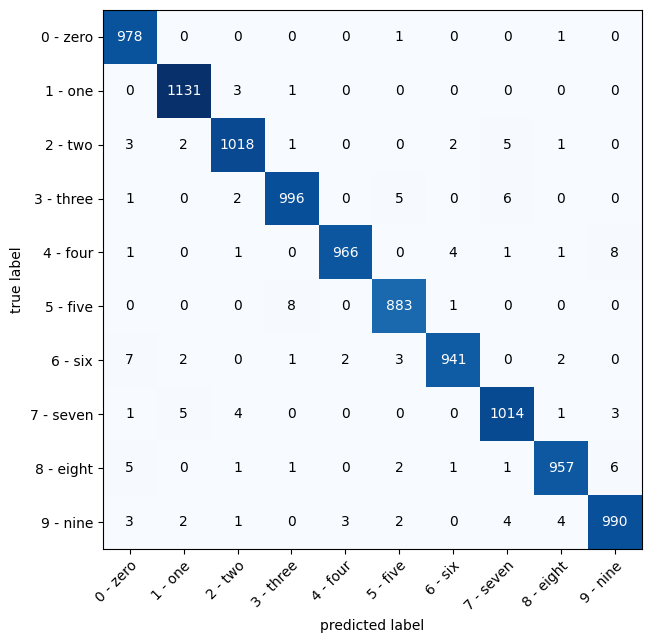

In [15]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [16]:
test_tensor = torch.rand(1,3,64,64)
conv_layer = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=10)
out_tensor = conv_layer(test_tensor)
print(out_tensor.shape)

torch.Size([1, 10, 55, 55])


The bigger the kernel size is, the smaller the output is.

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

It's a data error. Some classes look too much alike, so their labels are confusing.

In [17]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:01<00:00, 18465136.45it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 334032.77it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 6171967.95it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 19900716.12it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [18]:
# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch?
    shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False # don't necessarily have to shuffle the testing data
)

In [19]:
model_2.load_state_dict(model_2_initial_state_dict)
optimizer = torch.optim.SGD(params=model_2.parameters(),
                          lr=0.1)

In [20]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 5
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.59518 | Train accuracy: 78.38%
Test loss: 0.39500 | Test accuracy: 85.99%

Epoch: 1
---------
Train loss: 0.36536 | Train accuracy: 86.90%
Test loss: 0.35244 | Test accuracy: 86.91%

Epoch: 2
---------
Train loss: 0.32588 | Train accuracy: 88.13%
Test loss: 0.32719 | Test accuracy: 88.07%

Epoch: 3
---------
Train loss: 0.30489 | Train accuracy: 88.92%
Test loss: 0.32312 | Test accuracy: 88.25%

Epoch: 4
---------
Train loss: 0.28981 | Train accuracy: 89.56%
Test loss: 0.30836 | Test accuracy: 88.91%

Train time on cpu: 244.212 seconds


In [21]:
# 1. Make predictions with trained model
y_preds = []
y_true = []
X_mislabeled = []

model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
    # print(y_pred.shape)
    # print(y[0])

    for i in range(len(y)):
      if y[i] != y_pred[i]:
        # Put predictions on CPU for evaluation
        y_preds.append(y_pred[i])
        y_true.append(y[i])
        X_mislabeled.append(X[i].cpu())

# Concatenate list of predictions into a tensor
X_mislabeled_tensor = torch.cat(X_mislabeled)
print(X_mislabeled_tensor.shape)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

torch.Size([1110, 28, 28])


In [22]:
import random
random.seed(42)

test_samples = []
test_preds = []
test_true = []
for i in random.sample(range(X_mislabeled_tensor.shape[0]), k=9):
    test_samples.append(X_mislabeled[i])
    test_preds.append(y_preds[i])
    test_true.append(y_true[i])

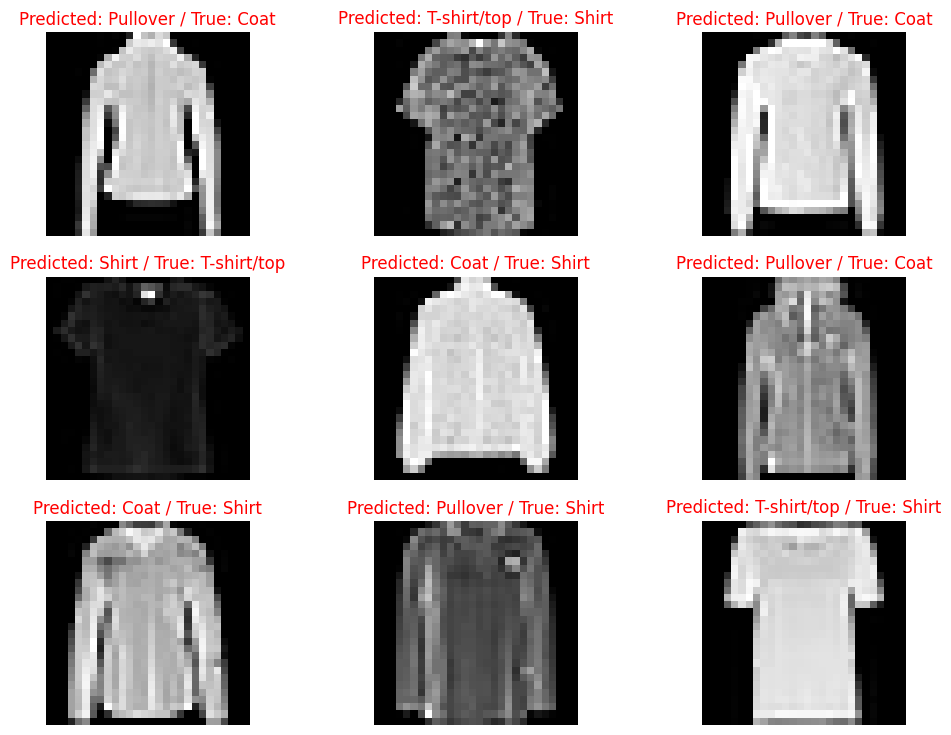

In [23]:
# Plot images
class_names = train_data.classes
fig = plt.figure(figsize=(12, 9))
rows, cols = 3, 3
for i in range(1, rows * cols + 1):
    pred_label = test_preds[i-1]
    truth_label = test_true[i-1]
    fig.add_subplot(rows, cols, i)
    plt.imshow(test_samples[i-1].squeeze(), cmap="gray")
    title_text = f"Predicted: {class_names[pred_label]} / True: {class_names[truth_label]}"

    # Check for equality and change title colour accordingly
    if pred_label == truth_label:
        plt.title(title_text, fontsize=12, c="g") # green text if correct
    else:
        plt.title(title_text, fontsize=12, c="r") # red text if wrong
    plt.axis(False);